In [1]:
import pandas as pd

df = pd.read_csv("../data/processed/train_eda_clean.csv")

df.shape

(20631, 20)

In [2]:
RUL_CAP = 130
df['RUL_capped'] = df['RUL'].clip(upper=RUL_CAP)

In [3]:
df[['RUL','RUL_capped']].describe()

,RUL,RUL_capped
count,20631.000000,20631.000000
mean,107.807862,88.727304
std,68.880990,43.444137
min,0.000000,0.000000
25%,51.000000,51.000000
50%,103.000000,103.000000
75%,155.000000,130.000000
max,361.000000,130.000000


In [4]:
important_sensors = [
    'sensor_11','sensor_4','sensor_15',
    'sensor_2','sensor_17','sensor_12',
    'sensor_7','sensor_21','sensor_20'
]

In [5]:
window = 10

for sensor in important_sensors:
    df[f'{sensor}_roll_mean'] = (
        df.groupby('unit')[sensor]
          .rolling(window=window, min_periods=1)
          .mean()
          .reset_index(level=0, drop=True)
    )

In [6]:
df.head()

,unit,cycle,op_setting_1,op_setting_2,sensor_2,sensor_3,sensor_4,sensor_6,sensor_7,sensor_8,...,RUL_capped,sensor_11_roll_mean,sensor_4_roll_mean,sensor_15_roll_mean,sensor_2_roll_mean,sensor_17_roll_mean,sensor_12_roll_mean,sensor_7_roll_mean,sensor_21_roll_mean,sensor_20_roll_mean
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,...,130.0,47.470,1400.600000,8.419500,641.820000,392.000000,521.660,554.360000,23.419000,39.060000
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,...,130.0,47.480,1401.870000,8.425650,641.985000,392.000000,521.970,554.055000,23.421300,39.030000
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,...,130.0,47.410,1402.646667,8.423033,642.106667,391.333333,522.120,554.123333,23.395600,39.003333
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,...,130.0,47.340,1402.452500,8.409325,642.167500,391.500000,522.305,554.205000,23.390175,38.972500
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,...,130.0,47.328,1403.206000,8.413340,642.208000,391.800000,522.282,554.164000,23.393020,38.958000


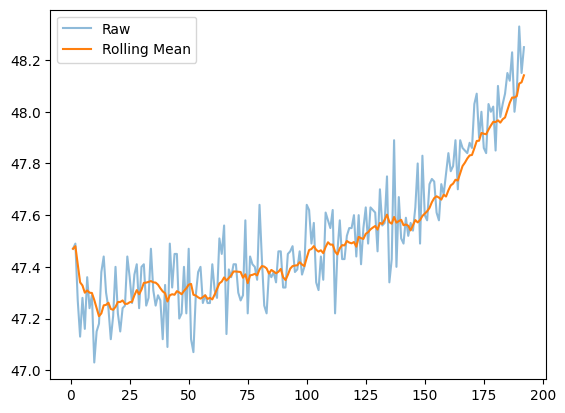

In [7]:
engine_1 = df[df['unit']==1]

import matplotlib.pyplot as plt

plt.plot(engine_1['cycle'], engine_1['sensor_11'], alpha=0.5, label='Raw')
plt.plot(engine_1['cycle'], engine_1['sensor_11_roll_mean'], label='Rolling Mean')
plt.legend()
plt.show()

In [8]:
import os
os.makedirs("../data/features", exist_ok=True)

df.to_csv("../data/features/train_features_v1.csv", index=False)

In [9]:
for sensor in important_sensors:
    df[f'{sensor}_roll_std'] = (
        df.groupby('unit')[sensor]
          .rolling(window=window, min_periods=1)
          .std()
          .reset_index(level=0, drop=True)
    )

In [13]:
df.fillna(0, inplace=True)

,unit,cycle,op_setting_1,op_setting_2,sensor_2,sensor_3,sensor_4,sensor_6,sensor_7,sensor_8,...,sensor_20_roll_mean,sensor_11_roll_std,sensor_4_roll_std,sensor_15_roll_std,sensor_2_roll_std,sensor_17_roll_std,sensor_12_roll_std,sensor_7_roll_std,sensor_21_roll_std,sensor_20_roll_std
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,...,39.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,...,39.030000,0.014142,1.796051,0.008697,0.233345,0.000000,0.438406,0.431335,0.003253,0.042426
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,...,39.003333,0.121655,1.850009,0.007640,0.267644,1.154701,0.404475,0.327159,0.044573,0.055076
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,...,38.972500,0.171659,1.559645,0.028117,0.250117,1.000000,0.495950,0.313103,0.037977,0.076322
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,...,38.958000,0.151063,2.159440,0.025953,0.234776,1.095445,0.432574,0.286234,0.033498,0.073621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,21.61,551.43,2388.19,...,38.453000,0.101346,3.726081,0.023486,0.244004,1.414214,0.364265,0.406231,0.077684,0.154923
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,21.61,550.86,2388.23,...,38.416000,0.101346,4.021365,0.023504,0.238470,1.449138,0.349859,0.449469,0.065961,0.140886
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,21.61,550.94,2388.24,...,38.424000,0.080857,4.021654,0.026468,0.221410,1.549193,0.351764,0.425129,0.081577,0.139619
20629,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,21.61,550.68,2388.25,...,38.388000,0.114523,3.753280,0.024477,0.218388,1.563472,0.339773,0.478962,0.081498,0.119889


In [11]:
df.to_csv("../data/features/train_features_v2.csv", index=False)

In [14]:
for sensor in important_sensors:
    df[f'{sensor}_baseline_adj'] = (
        df[sensor] - df.groupby('unit')[sensor].transform('first')
    )

In [15]:
df.to_csv("../data/features/train_features_v3.csv", index=False)